In [13]:
!pip install nltk

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

example_sent = """This is a sample sentence, showing off the stop words filtration."""
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)

# Convert words to lowercase and filter stopwords
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
from nltk.corpus import stopwords

# Create the 'text.txt' file with some content
with open("text.txt", "w") as f:
    f.write("This is an example sentence to test the stop words filtration.")

stop_words = set(stopwords.words('english'))

file1 = open("text.txt")
line = file1.read()
words = line.split()

# Clear the content of filteredtext.txt before appending, if it exists
# Or, open in 'w' mode initially if we always want to overwrite
# For this example, let's ensure it's fresh for each run
with open('filteredtext.txt', 'w') as appendFile:
    for r in words:
        if not r.lower() in stop_words: # Convert word to lowercase for comparison
            appendFile.write(" " + r)


In [17]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

words = ["program", "programs", "programmer", "programming", "programmers"]
for w in words:
    print(w, ":", ps.stem(w))


program : program
programs : program
programmer : programm
programming : program
programmers : programm


In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)

for w in words:
    print(w, ":", ps.stem(w))


Programmers : programm
program : program
with : with
programming : program
languages : languag


In [20]:
#practical 2
# Define the documents
document1 = "The quick brown fox jumped over the lazy dog."
document2 = "The lazy dog slept in the sun."

# Step 1: Tokenize the documents
# Convert each document to lowercase and split it into words
tokens1 = document1.lower().split()
tokens2 = document2.lower().split()

# Combine the tokens into a list of unique terms
terms = list(set(tokens1 + tokens2))

# Step 2: Build the inverted index
# Create an empty dictionary to store the inverted index
inverted_index = {}

# For each term, find the documents that contain it
for term in terms:
    documents = []
    if term in tokens1:
        documents.append("Document 1")
    if term in tokens2:
        documents.append("Document 2")
    inverted_index[term] = documents

# Step 3: Print the inverted index
for term, documents in inverted_index.items():
    print(term, "->", ", ".join(documents))


sun. -> Document 2
slept -> Document 2
brown -> Document 1
over -> Document 1
fox -> Document 1
in -> Document 2
lazy -> Document 1, Document 2
dog. -> Document 1
quick -> Document 1
jumped -> Document 1
dog -> Document 2
the -> Document 1, Document 2


In [22]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.6 MB/s eta 0:00:00


In [33]:
#practical 3


import numpy as np
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork # Changed from BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Download heart.csv if it doesn't exist
import os
if not os.path.exists('heart.csv'):
    # Using a common public dataset URL
    !wget -q https://raw.githubusercontent.com/plotly/datasets/master/heart.csv

# Read the heart disease data
heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?', np.nan)

# Rename 'target' column to 'heartdisease' to match model definition
heartDisease = heartDisease.rename(columns={'target': 'heartdisease'})

# Display sample data
print('Few examples from the dataset:')
print(heartDisease.head())

# Define the structure of the Bayesian Network
model = DiscreteBayesianNetwork([ # Changed from BayesianNetwork
    ('age', 'trestbps'),
    ('age', 'fbs'),
    ('sex', 'trestbps'),
    ('exang', 'trestbps'),
    ('trestbps', 'heartdisease'),
    ('fbs', 'heartdisease'),
    ('heartdisease', 'restecg'),
    ('heartdisease', 'thalach'),
    ('heartdisease', 'chol')
])

# Learn CPDs using Maximum Likelihood Estimator
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

# Inference with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

# Probability of HeartDisease given Age=29 (changed from 28 to a valid age)
print('\n1. Probability of HeartDisease given Age=29')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 29})
print(q)

# Probability of HeartDisease given cholesterol=100 (changed to a valid value)
print('\n2. Probability of HeartDisease given cholesterol=126')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'chol': 126})
print(q)

Few examples from the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  heartdisease  
0   0     1             1  
1   0     2             1  
2   0     2             1  
3   0     2             1  
4   0     2             1  

Learning CPD using Maximum likelihood estimators

Inferencing with Bayesian Network:

1. Probability of HeartDisease given Age=29
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3872 |
+--------------

/tmp/ipython-input-786866770.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


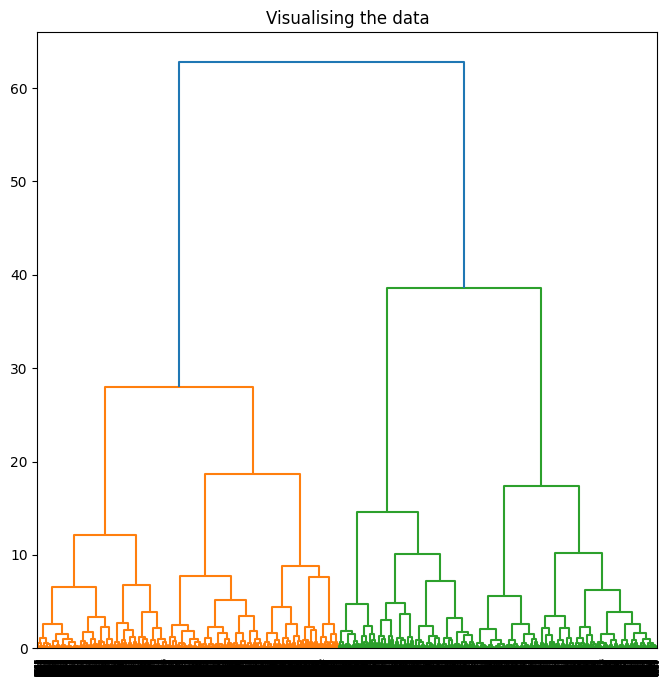

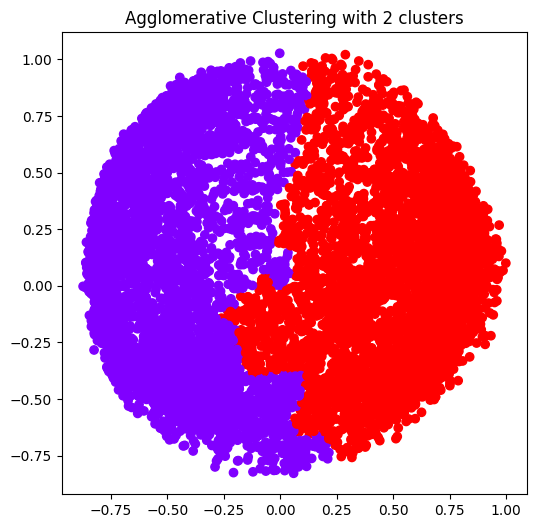

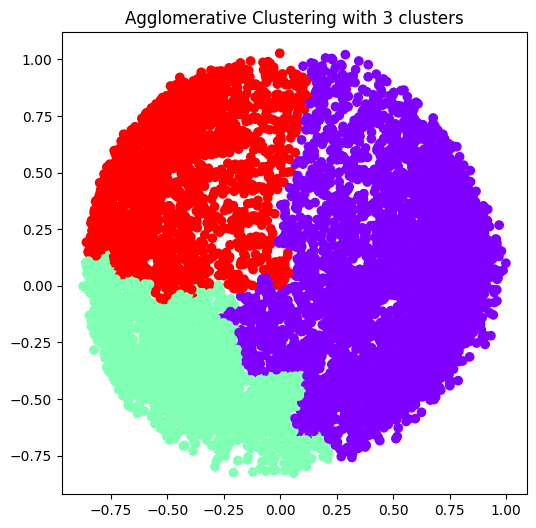

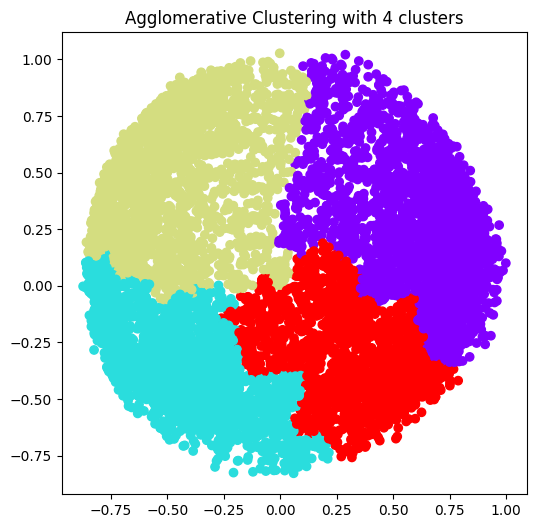

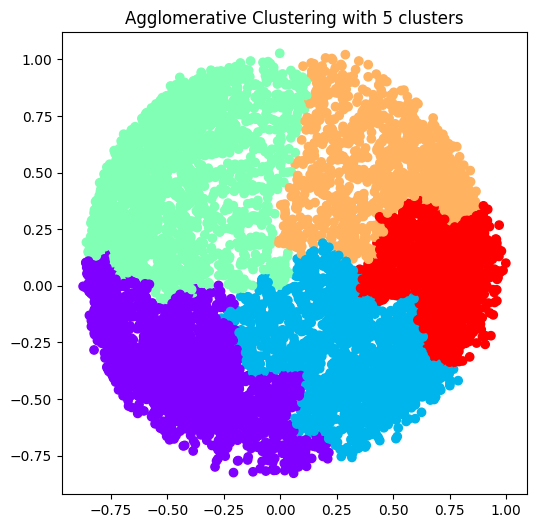

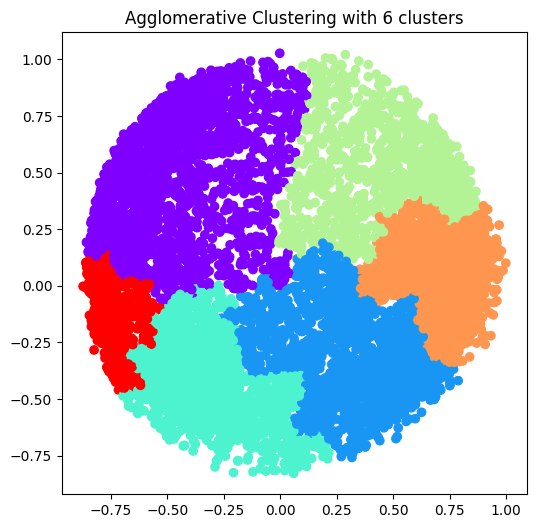

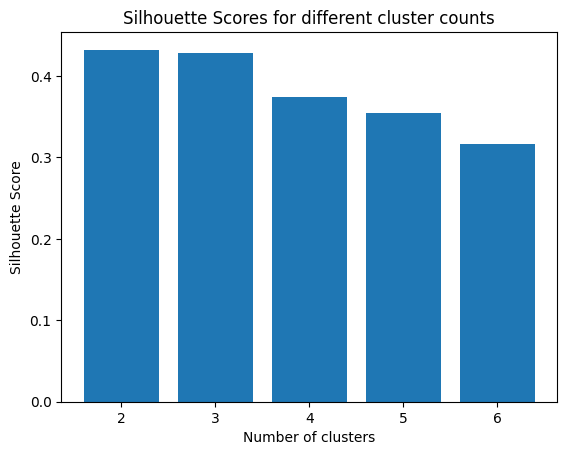

In [38]:
#practical 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Load the dataset (example Credit Card data)
X = pd.read_csv('/content/CC GENERAL (1) (1).csv')
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)

# Scale and normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

# Plot dendrogram
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
dendrogram = shc.dendrogram(shc.linkage(X_principal, method='ward'))

# Perform Agglomerative Clustering and scatter plot for different cluster sizes
for n_clusters in [2, 3, 4, 5, 6]:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=ac.fit_predict(X_principal), cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {n_clusters} clusters')
    plt.show()

# Evaluate cluster quality using Silhouette scores
k = [2, 3, 4, 5, 6]
silhouette_scores = []
for clusters in k:
    ac = AgglomerativeClustering(n_clusters=clusters)
    score = silhouette_score(X_principal, ac.fit_predict(X_principal))
    silhouette_scores.append(score)

# Plot Silhouette scores
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different cluster counts')
plt.show()


In [39]:
#practical 5
import networkx as nx

def pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1.0e-6, nstart=None, weight='weight', dangling=None):
    if len(G) == 0:
        return {}
    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G
    W = nx.stochastic_graph(D, weight=weight)
    N = W.number_of_nodes()
    if nstart is None:
        x = dict.fromkeys(W, 1.0 / N)
    else:
        s = float(sum(nstart.values()))
        x = dict((k, v / s) for k, v in nstart.items())
    if personalization is None:
        p = dict.fromkeys(W, 1.0 / N)
    else:
        missing = set(G) - set(personalization)
        if missing:
            raise ValueError('Personalization dictionary must have a value for every node')
        s = float(sum(personalization.values()))
        p = dict((k, v / s) for k, v in personalization.items())
    if dangling is None:
        dangling_weights = p
    else:
        missing = set(G) - set(dangling)
        if missing:
            raise ValueError('Dangling node dictionary must have a value for every node')
        s = float(sum(dangling.values()))
        dangling_weights = dict((k, v/s) for k, v in dangling.items())
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]
    for _ in range(max_iter):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
        for n in x:
            for nbr in W[n]:
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*tol:
            return x
    raise Exception('pagerank: power iteration failed to converge in %d iterations.' % max_iter)

# Example usage
G = nx.barabasi_albert_graph(60, 41)
pr = nx.pagerank(G, 0.4)
print(pr)


{0: 0.03151086577227294, 1: 0.012765710811905586, 2: 0.01317266818575693, 3: 0.013386850543829125, 4: 0.0125561644501577, 5: 0.013178150813923449, 6: 0.013179427070024195, 7: 0.012954098654641713, 8: 0.012778512910704498, 9: 0.013571246821299135, 10: 0.012945620098983576, 11: 0.012977002784360757, 12: 0.013357537698236681, 13: 0.01317412197666018, 14: 0.01317268856848527, 15: 0.013573608101934406, 16: 0.010213641120657318, 17: 0.013173866110324204, 18: 0.011956504710127769, 19: 0.013152028593905542, 20: 0.012778540442084041, 21: 0.012980083704773104, 22: 0.01277882184766493, 23: 0.013362052041685918, 24: 0.012963286299198776, 25: 0.013175762478943528, 26: 0.012557798937245854, 27: 0.011795367292134706, 28: 0.012973289012887862, 29: 0.012377679937763654, 30: 0.01336004002040114, 31: 0.013565129546276268, 32: 0.013170206243370435, 33: 0.013159329222046028, 34: 0.013565129546276268, 35: 0.012773438940991361, 36: 0.012977186770729099, 37: 0.01317244095233828, 38: 0.013162394165980255, 39: 